# scikit-ipp _(skipp)_
### Introductory examples for scikit-ipp

* __Filters__:
    * Gaussian filter
    * Median filter
    * Laplace filter
    * Prewitt filters
    * Sobel filters
* __Morphology__:
    * erosion
    * dilation

In [1]:
import skipp.skipp.filters
import skipp.skipp.morphology
import skimage.filters
import skimage.morphology
import scipy.ndimage
import numpy as np

# for similarity tests
from numpy.testing import assert_array_almost_equal

# plotting
import matplotlib.pyplot as plt

In [2]:
def showCompared(X, Y, x_name='X',  y_name='Y', cmap=None):
    fig, axes = plt.subplots(2, 1, figsize=(12, 12))
    ax = axes.ravel()
    ax[0].imshow(X, cmap=cmap)
    ax[0].set_title(x_name)
    ax[1].imshow(Y, cmap=cmap)
    ax[1].set_title(y_name)

def imageInfo(image):
    print("Dimensions: {} \nStrides: {} \nShape: {} \nDtype: {}".format(image.ndim, 
                                                                        image.strides, image.shape, image.dtype))

In [3]:
from skimage import img_as_float32

### some data for processing

In [4]:
x = np.random.RandomState(0).randn(16, 4)
x

array([[ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ],
       [ 1.86755799, -0.97727788,  0.95008842, -0.15135721],
       [-0.10321885,  0.4105985 ,  0.14404357,  1.45427351],
       [ 0.76103773,  0.12167502,  0.44386323,  0.33367433],
       [ 1.49407907, -0.20515826,  0.3130677 , -0.85409574],
       [-2.55298982,  0.6536186 ,  0.8644362 , -0.74216502],
       [ 2.26975462, -1.45436567,  0.04575852, -0.18718385],
       [ 1.53277921,  1.46935877,  0.15494743,  0.37816252],
       [-0.88778575, -1.98079647, -0.34791215,  0.15634897],
       [ 1.23029068,  1.20237985, -0.38732682, -0.30230275],
       [-1.04855297, -1.42001794, -1.70627019,  1.9507754 ],
       [-0.50965218, -0.4380743 , -1.25279536,  0.77749036],
       [-1.61389785, -0.21274028, -0.89546656,  0.3869025 ],
       [-0.51080514, -1.18063218, -0.02818223,  0.42833187],
       [ 0.06651722,  0.3024719 , -0.63432209, -0.36274117],
       [-0.67246045, -0.35955316, -0.81314628, -1.7262826 ]])

In [5]:
xc = np.copy(x)
xc

array([[ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ],
       [ 1.86755799, -0.97727788,  0.95008842, -0.15135721],
       [-0.10321885,  0.4105985 ,  0.14404357,  1.45427351],
       [ 0.76103773,  0.12167502,  0.44386323,  0.33367433],
       [ 1.49407907, -0.20515826,  0.3130677 , -0.85409574],
       [-2.55298982,  0.6536186 ,  0.8644362 , -0.74216502],
       [ 2.26975462, -1.45436567,  0.04575852, -0.18718385],
       [ 1.53277921,  1.46935877,  0.15494743,  0.37816252],
       [-0.88778575, -1.98079647, -0.34791215,  0.15634897],
       [ 1.23029068,  1.20237985, -0.38732682, -0.30230275],
       [-1.04855297, -1.42001794, -1.70627019,  1.9507754 ],
       [-0.50965218, -0.4380743 , -1.25279536,  0.77749036],
       [-1.61389785, -0.21274028, -0.89546656,  0.3869025 ],
       [-0.51080514, -1.18063218, -0.02818223,  0.42833187],
       [ 0.06651722,  0.3024719 , -0.63432209, -0.36274117],
       [-0.67246045, -0.35955316, -0.81314628, -1.7262826 ]])

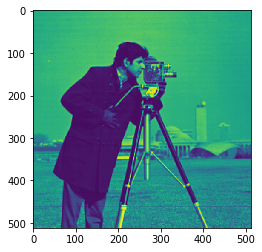

In [6]:
from skimage.data import camera
camera = camera()
camera_float32 = camera.astype(np.float32)
plt.imshow(camera_float32)

uint8
(300, 512, 3)


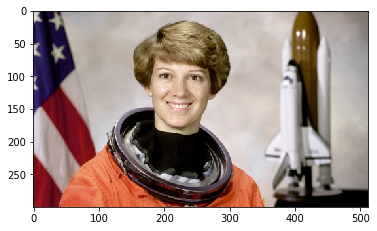

In [7]:
from skimage.data import astronaut
from skimage.color import rgb2gray

astronaut = astronaut()[:300,]
# astronaut = astronaut[...,1].astype(np.float32)
print(astronaut.dtype)
print(astronaut.shape)
plt.imshow(astronaut)

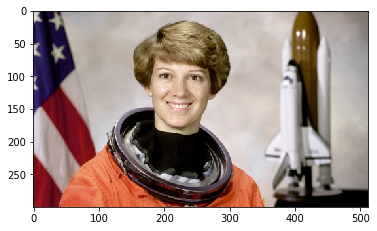

In [8]:
# astronaut as np.float32
astronaut_float32 = img_as_float32(astronaut)
plt.imshow(astronaut_float32)

# Filters module

# Gaussian filter

dtypes: 
* np.float32
* np.uint8, np.uint16, np.int16

### np.uint8 input(output) image

In [9]:
imageInfo(astronaut)

Dimensions: 3 
Strides: (1536, 3, 1) 
Shape: (300, 512, 3) 
Dtype: uint8


In [10]:
skimage_gaussian_result = skimage.filters.gaussian(astronaut, sigma=3)

/localdisk/work/snasibli/miniconda3/envs/temp_jupyter_skipp_2/lib/python3.7/site-packages/skimage/filters/_gaussian.py:122: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  warn(RuntimeWarning(msg))


In [11]:
skipp_gaussian_result = skipp.skipp.filters.gaussian(astronaut, sigma=3)

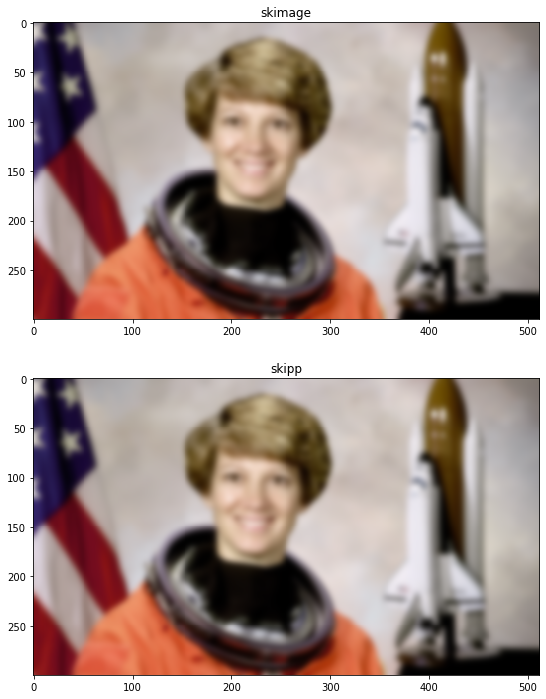

In [12]:
showCompared(skimage_gaussian_result, skipp_gaussian_result, x_name='skimage', y_name='skipp')

In [13]:
imageInfo(skimage_gaussian_result)

Dimensions: 3 
Strides: (12288, 24, 8) 
Shape: (300, 512, 3) 
Dtype: float64


In [14]:
imageInfo(skipp_gaussian_result)

Dimensions: 3 
Strides: (1536, 3, 1) 
Shape: (300, 512, 3) 
Dtype: uint8


__NOTE:__ `skimage.filters.gaussian` didn't use the value of output parameter. It returned only the image of np.float32 or np.float64 dtype, even if explicitly specify the output dtype. `skimage.filters.gaussian` is a wrapper around `scipy.ndi.gaussian_filter`. But the scikit-image's `gaussian` doesn't pass the `output` to `scipy.ndi.gaussian_filter`.
Therefor skipp's gaussian filter results compared with `scipy`'s `gaussian_filter`

In [15]:
scipy_gaussian_result = scipy.ndimage.filters.gaussian_filter(astronaut, sigma=3)

In [16]:
skipp_gaussian_result = skipp.skipp.filters.gaussian(astronaut, sigma=3)

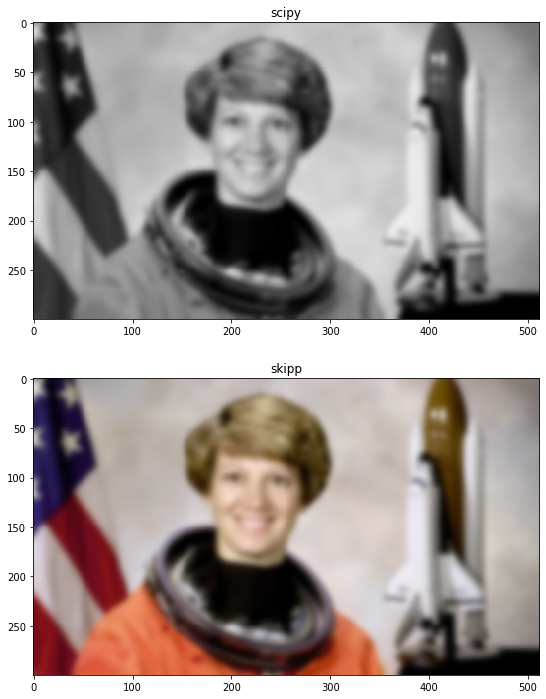

In [17]:
showCompared(scipy_gaussian_result, skipp_gaussian_result, x_name='scipy', y_name='skipp')

### np.uint16 input(output) image

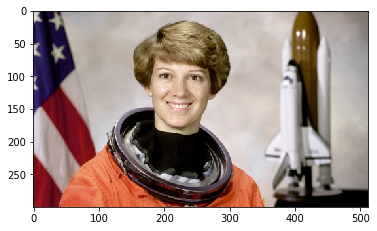

In [18]:
# original image np.uint16
astronaut = astronaut.astype(np.uint16)
plt.imshow(astronaut)

In [19]:
scipy_gaussian_result = scipy.ndimage.filters.gaussian_filter(astronaut, sigma=3)

In [20]:
skipp_gaussian_result = skipp.skipp.filters.gaussian(astronaut, sigma=3)

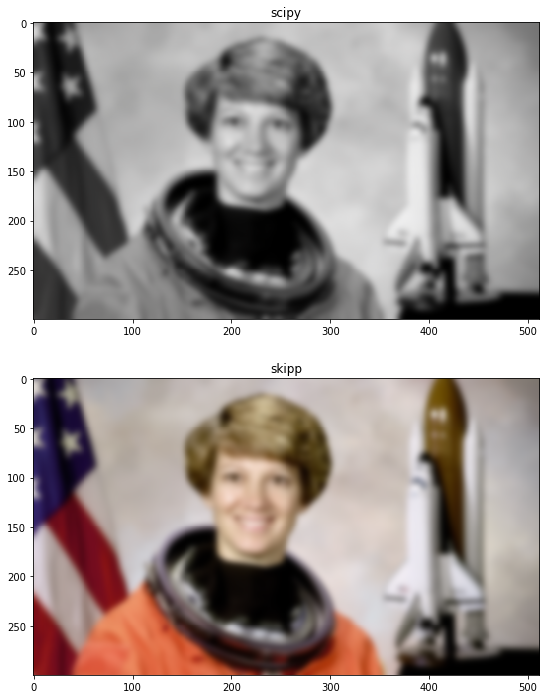

In [21]:
showCompared(scipy_gaussian_result, skipp_gaussian_result, x_name='scipy', y_name='skipp')

### np.float32 input(output) image

In [22]:
skipp_gaussian_result = skipp.skipp.filters.gaussian(astronaut_float32, sigma=3)

In [23]:
skimage_gaussian_result = skimage.filters.gaussian(astronaut_float32, sigma=3)

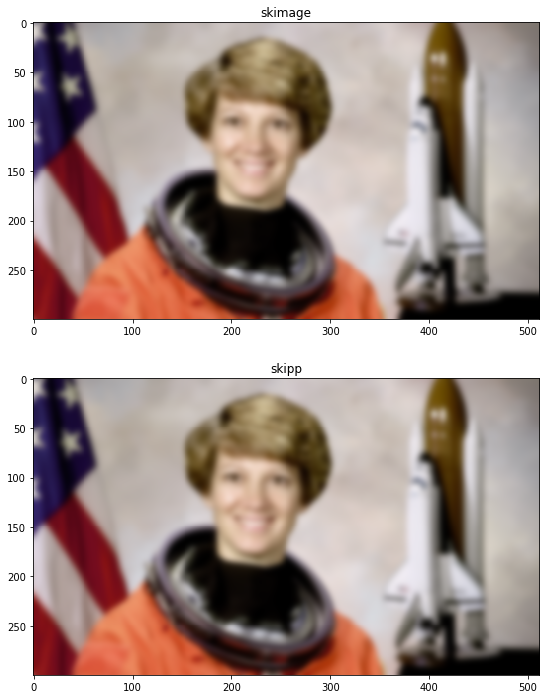

In [24]:
showCompared(skimage_gaussian_result, skipp_gaussian_result, x_name='skimage', y_name='skipp')

In [25]:
# passes if desired precision is 4
assert_array_almost_equal(skimage_gaussian_result, skipp_gaussian_result, decimal=4)

Lets look another example with small size array

In [26]:
skipp_gaussian_result = skipp.skipp.filters.gaussian(x.astype(np.float32), sigma=3)
skipp_gaussian_result

array([[ 1.1302577 ,  1.1138633 ,  1.1218987 ,  1.1526212 ],
       [ 0.9555214 ,  0.92851555,  0.92079765,  0.9321876 ],
       [ 0.7751307 ,  0.7384391 ,  0.7158843 ,  0.70878637],
       [ 0.60643184,  0.5621269 ,  0.5275914 ,  0.50539666],
       [ 0.46152306,  0.4131816 ,  0.37178168,  0.3406772 ],
       [ 0.34297767,  0.29600903,  0.25515807,  0.22387145],
       [ 0.2434917 ,  0.20493591,  0.17365977,  0.15235707],
       [ 0.15040527,  0.12772933,  0.1149368 ,  0.1131273 ],
       [ 0.0525113 ,  0.05140664,  0.06328335,  0.08705222],
       [-0.05468792, -0.03279074,  0.00457349,  0.05402859],
       [-0.16810207, -0.12762028, -0.07077193, -0.00267884],
       [-0.28042278, -0.23130277, -0.16709071, -0.09352935],
       [-0.38493386, -0.34025577, -0.28399023, -0.2210617 ],
       [-0.4784715 , -0.45083618, -0.4168826 , -0.3793525 ],
       [-0.5612556 , -0.5595247 , -0.55769193, -0.555376  ],
       [-0.6345544 , -0.66203463, -0.69565856, -0.7315969 ]],
      dtype=float32)

In [27]:
skimage_gaussian_result = skimage.filters.gaussian(xc.astype(np.float32), sigma=3)
skimage_gaussian_result

array([[ 1.1302053 ,  1.1138256 ,  1.1218733 ,  1.1526053 ],
       [ 0.95550597,  0.9285106 ,  0.9208028 ,  0.93220085],
       [ 0.775139  ,  0.7384525 ,  0.71590185,  0.70880693],
       [ 0.6064151 ,  0.56211424,  0.52758163,  0.50538874],
       [ 0.4615165 ,  0.41317984,  0.37178406,  0.34068292],
       [ 0.34298107,  0.29601702,  0.25517008,  0.22388686],
       [ 0.24350585,  0.20495312,  0.17367934,  0.15237822],
       [ 0.1504316 ,  0.12775582,  0.11496238,  0.11315095],
       [ 0.05255106,  0.05144278,  0.06331418,  0.08707657],
       [-0.05463421, -0.03274479,  0.00460959,  0.05405364],
       [-0.16803572, -0.127565  , -0.07072998, -0.00265125],
       [-0.28034663, -0.23123927, -0.16704184, -0.09349585],
       [-0.38485187, -0.34018567, -0.28393334, -0.22101824],
       [-0.47841403, -0.45079997, -0.4168692 , -0.37936145],
       [-0.5612301 , -0.5594967 , -0.5576616 , -0.55534375],
       [-0.6345189 , -0.66200185, -0.6956279 , -0.73156816]],
      dtype=float32)

In [28]:
# passes if desired precision is 4
assert_array_almost_equal(skimage_gaussian_result, skipp_gaussian_result, decimal=4)

# Median filter

Currently scikit-ipp's median filter supports np.uint8, np.uint16, np.int16, np.float32 input/output image dtypes

In [29]:
mask = np.ones((5,5), dtype=np.uint8, order='C')
mask

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

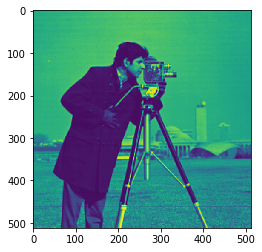

In [30]:
# original image
plt.imshow(camera)

### np.uint8

In [31]:
skipp_median_result = skipp.skipp.filters.median(camera, mask )

In [32]:
skimage_median_result = skimage.filters.median(camera, mask )

In [33]:
camera.dtype

dtype('uint8')

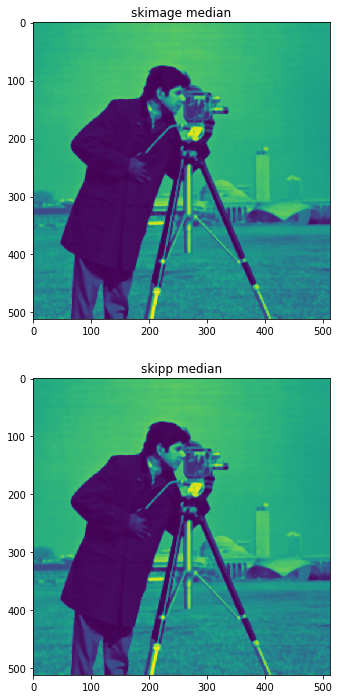

In [34]:
showCompared(skimage_median_result, skipp_median_result, x_name='skimage median', y_name='skipp median')

So little mismatch in results

In [35]:
try:
    assert_array_almost_equal(skimage_median_result, skipp_median_result)
except Exception as e:
    print(str(e))


Arrays are not almost equal to 6 decimals

Mismatch: 0.426%
Max absolute difference: 255
Max relative difference: 7.72727273
 x: array([[157, 157, 157, ..., 152, 152, 152],
       [157, 157, 157, ..., 152, 152, 152],
       [157, 157, 157, ..., 152, 152, 152],...
 y: array([[156, 157, 158, ..., 152, 152, 152],
       [157, 157, 157, ..., 152, 152, 152],
       [157, 157, 157, ..., 152, 152, 152],...


### np.float32

In [36]:
skipp_median_result = skipp.skipp.filters.median(camera_float32, mask)

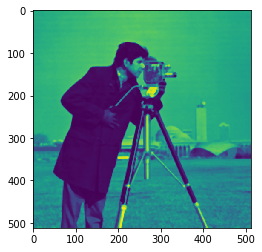

In [37]:
plt.imshow(skipp_median_result)

In [38]:
try:
    skimage_median_result = skimage.filters.median(camera_float32, mask.astype(np.float32))
except Exception as e:
    print(str(e))

Images of type float must be between -1 and 1.


`skimage.filters.median` requiers images of type float, that is must be between -1 and 1

Lets convert original `camera` image from `skimage.data` by using `skimage`'s `img_as_float32`

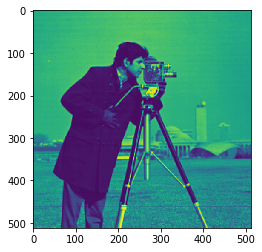

In [39]:
camera_as_float32 = img_as_float32(camera)
plt.imshow(camera_as_float32)

In [40]:
skipp_median_result = skipp.skipp.filters.median(camera_as_float32, mask)

In [41]:
skimage_median_result = skimage.filters.median(camera_as_float32, mask)

/localdisk/work/snasibli/miniconda3/envs/temp_jupyter_skipp_2/lib/python3.7/site-packages/skimage/util/dtype.py:135: UserWarning: Possible precision loss when converting from float32 to uint8
  .format(dtypeobj_in, dtypeobj_out))


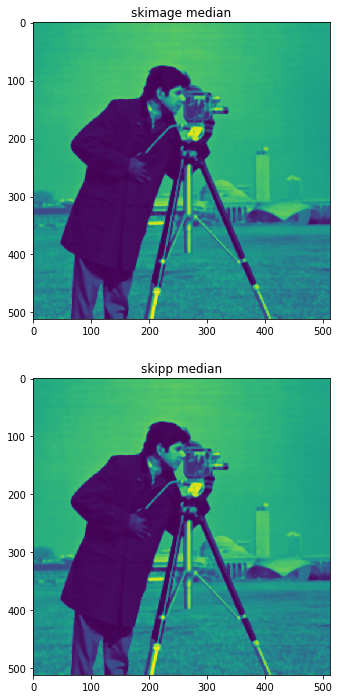

In [42]:
showCompared(skimage_median_result, skipp_median_result, x_name='skimage median', y_name='skipp median')

In [43]:
try:
    assert_array_almost_equal(skimage_median_result, skipp_median_result)
except Exception as e:
    print(str(e))


Arrays are not almost equal to 6 decimals

Mismatch: 100%
Max absolute difference: 251.01176
Max relative difference: 288.8947
 x: array([[157, 157, 157, ..., 152, 152, 152],
       [157, 157, 157, ..., 152, 152, 152],
       [157, 157, 157, ..., 152, 152, 152],...
 y: array([[0.611765, 0.615686, 0.619608, ..., 0.596078, 0.596078, 0.596078],
       [0.615686, 0.615686, 0.615686, ..., 0.596078, 0.596078, 0.596078],
       [0.615686, 0.615686, 0.615686, ..., 0.596078, 0.596078, 0.596078],...


In [44]:
skimage_median_result.dtype

dtype('uint8')

Note: `skimage.filters.median` returns an unexpected image type

### Median filter for multichannel image

__scikit-ipp__'s median filter can process the multichannel image, unlike __scikit-image__'s one

In [45]:
from skimage.data import astronaut
image_3C = astronaut()

In [46]:
skipp_median_result = skipp.skipp.filters.median(image_3C, mask)

In [47]:
try:
    skimage_median_result = skimage.filters.median(image_3C, mask)
except Exception as e:
    print(str(e))  

The parameter `image` must be a 2-dimensional array


The result of `scikit-ipp`'s `median` filter

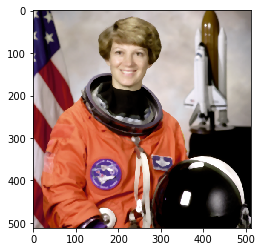

In [48]:
plt.imshow(skipp_median_result)

In [49]:
del image_3C

# Laplace filter

In [50]:
skipp_laplace_result = skipp.skipp.filters.laplace(camera.astype(np.float32))

In [51]:
skimage_laplace_result = skimage.filters.laplace(camera.astype(np.float32))

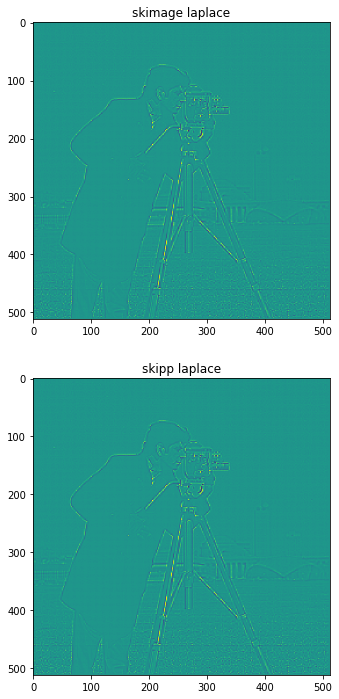

In [52]:
showCompared(skimage_laplace_result, skipp_laplace_result, x_name='skimage laplace', y_name='skipp laplace')

In [53]:
# similarity test passes for desired precision more than 10 decimals
try:
    assert_array_almost_equal(skimage_laplace_result, skipp_laplace_result, decimal=10)
except Exception as e:
    print(str(e))  

# Prewitt filters

## prewitt

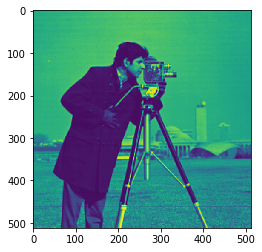

In [54]:
# original image
plt.imshow(camera_float32)

In [55]:
skipp_prewitt_result = skipp.skipp.filters.prewitt(camera_float32)

In [56]:
skimage_prewitt_result = skimage.filters.prewitt(camera_float32)

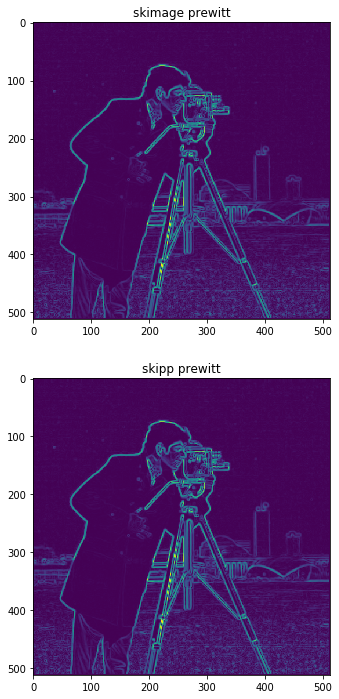

In [57]:
showCompared(skimage_prewitt_result, skipp_prewitt_result, x_name='skimage prewitt', y_name='skipp prewitt')

In [58]:
# passes if desired precision is 4
# so little mismatch if desired precision is 5
try:
    assert_array_almost_equal(skimage_prewitt_result, skipp_prewitt_result, decimal=4)
except Exception as e:
    print(str(e))  

Lets look another example with small size array

In [59]:
skipp.skipp.filters.prewitt(x.astype(np.float32))

array([[0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.72121996, 0.9533995 , 0.        ],
       [0.        , 0.262351  , 0.55249953, 0.        ],
       [0.        , 0.40059748, 0.6649443 , 0.        ],
       [0.        , 0.7172561 , 0.43295357, 0.        ],
       [0.        , 0.17464244, 0.27145654, 0.        ],
       [0.        , 0.98902416, 0.4077311 , 0.        ],
       [0.        , 1.2019135 , 0.561892  , 0.        ],
       [0.        , 0.6353399 , 0.36740056, 0.        ],
       [0.        , 0.46727657, 0.9723902 , 0.        ],
       [0.        , 1.227884  , 0.80036694, 0.        ],
       [0.        , 0.37831149, 1.2270315 , 0.        ],
       [0.        , 0.15651579, 0.8076926 , 0.        ],
       [0.        , 0.5909475 , 0.36383587, 0.        ],
       [0.        , 0.08961995, 0.50919056, 0.        ],
       [0.        , 0.        , 0.        , 0.        ]], dtype=float32)

In [60]:
skimage.filters.prewitt(xc.astype(np.float32))

array([[0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.7212199 , 0.9533996 , 0.        ],
       [0.        , 0.26235104, 0.55249953, 0.        ],
       [0.        , 0.40059745, 0.6649443 , 0.        ],
       [0.        , 0.7172562 , 0.43295354, 0.        ],
       [0.        , 0.17464246, 0.2714565 , 0.        ],
       [0.        , 0.9890242 , 0.40773106, 0.        ],
       [0.        , 1.2019135 , 0.561892  , 0.        ],
       [0.        , 0.63533986, 0.36740062, 0.        ],
       [0.        , 0.46727663, 0.9723901 , 0.        ],
       [0.        , 1.2278839 , 0.8003669 , 0.        ],
       [0.        , 0.3783115 , 1.2270315 , 0.        ],
       [0.        , 0.15651579, 0.8076927 , 0.        ],
       [0.        , 0.59094757, 0.36383587, 0.        ],
       [0.        , 0.08961994, 0.50919056, 0.        ],
       [0.        , 0.        , 0.        , 0.        ]], dtype=float32)

## prewitt_v

In [61]:
skipp_prewitt_v_result = skipp.skipp.filters.prewitt_v(camera_float32)

In [62]:
skimage_prewitt_v_result = skimage.filters.prewitt_v(camera_float32)

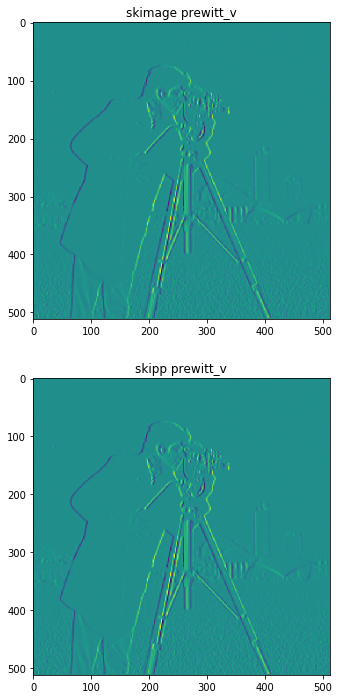

In [63]:
showCompared(skimage_prewitt_v_result, skipp_prewitt_v_result, x_name='skimage prewitt_v', y_name='skipp prewitt_v')

In [64]:
# so little mismatch if desired precision is 6
# passes if 4
try:
    assert_array_almost_equal(skimage_prewitt_v_result, skipp_prewitt_v_result, decimal=6)
except Exception as e:
    print(str(e)) 


Arrays are not almost equal to 6 decimals

Mismatch: 3.85%
Max absolute difference: 1.5258789e-05
Max relative difference: 1.1889964e-07
 x: array([[  0.      ,   0.      ,   0.      , ...,   0.      ,   0.      ,
          0.      ],
       [  0.      ,   1.666667,   0.666667, ...,   0.333333,   0.      ,...
 y: array([[  0.      ,   0.      ,   0.      , ...,   0.      ,   0.      ,
          0.      ],
       [  0.      ,   1.666667,   0.666667, ...,   0.333333,  -0.      ,...


In [65]:
skipp.skipp.filters.prewitt_v(x.astype(np.float32))

array([[ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        , -0.48517388,  1.2367772 ,  0.        ],
       [ 0.        , -0.3291272 ,  0.693865  ,  0.        ],
       [ 0.        , -0.4169745 ,  0.2022456 ,  0.        ],
       [ 0.        ,  0.63974667, -0.6109073 ,  0.        ],
       [ 0.        ,  0.00413942, -0.25917977,  0.        ],
       [ 0.        , -0.06146737, -0.40659937,  0.        ],
       [ 0.        , -1.0206516 ,  0.7710437 ,  0.        ],
       [ 0.        , -0.81852525, -0.15291111,  0.        ],
       [ 0.        , -0.57848704,  1.3344188 ,  0.        ],
       [ 0.        , -1.0061593 ,  1.0272253 ,  0.        ],
       [ 0.        , -0.22747636,  1.728667  ,  0.        ],
       [ 0.        ,  0.152637  ,  1.1413906 ,  0.        ],
       [ 0.        ,  0.16673826,  0.5144646 ,  0.        ],
       [ 0.        , -0.11963411, -0.14099285,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ]],
      dtype=float32)

In [66]:
skimage.filters.prewitt_v(xc.astype(np.float32))

array([[ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        , -0.48517385,  1.2367772 ,  0.        ],
       [ 0.        , -0.3291272 ,  0.693865  ,  0.        ],
       [ 0.        , -0.41697448,  0.2022456 ,  0.        ],
       [ 0.        ,  0.63974667, -0.61090726,  0.        ],
       [ 0.        ,  0.00413946, -0.25917974,  0.        ],
       [ 0.        , -0.06146733, -0.40659934,  0.        ],
       [ 0.        , -1.0206515 ,  0.77104366,  0.        ],
       [ 0.        , -0.8185252 , -0.15291114,  0.        ],
       [ 0.        , -0.57848704,  1.3344188 ,  0.        ],
       [ 0.        , -1.0061593 ,  1.0272251 ,  0.        ],
       [ 0.        , -0.22747637,  1.7286669 ,  0.        ],
       [ 0.        ,  0.152637  ,  1.1413906 ,  0.        ],
       [ 0.        ,  0.16673827,  0.5144646 ,  0.        ],
       [ 0.        , -0.11963409, -0.1409928 ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ]],
      dtype=float32)

## prewitt_h

In [67]:
skipp_prewitt_h_result = skipp.skipp.filters.prewitt_h(camera_float32)

In [68]:
skimage_prewitt_h_result = skimage.filters.prewitt_h(camera_float32)

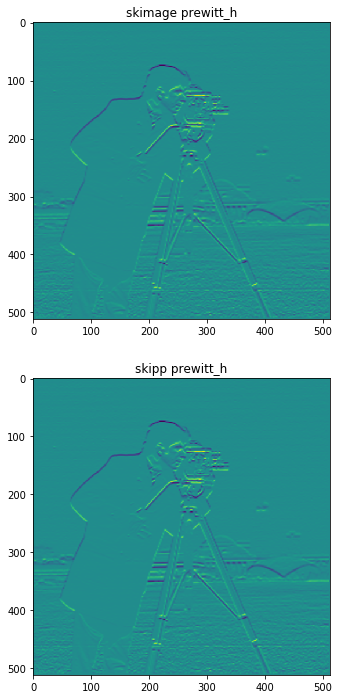

In [69]:
showCompared(skimage_prewitt_h_result, skipp_prewitt_h_result, x_name='skimage prewitt_h', y_name='skipp prewitt_h')

In [70]:
# so little mismatch if desired precision is 6
# passes if 4
try:
    assert_array_almost_equal(skimage_prewitt_h_result, skipp_prewitt_h_result, decimal=6)
except Exception as e:
    print(str(e))


Arrays are not almost equal to 6 decimals

Mismatch: 3.92%
Max absolute difference: 1.5258789e-05
Max relative difference: 1.1889964e-07
 x: array([[ 0.000000e+00,  0.000000e+00,  0.000000e+00, ...,  0.000000e+00,
         0.000000e+00,  0.000000e+00],
       [ 0.000000e+00, -6.666667e-01, -2.333333e+00, ...,  6.666667e-01,...
 y: array([[ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [ 0.      , -0.666667, -2.333333, ...,  0.666667,  0.      ,...


In [71]:
skipp.skipp.filters.prewitt_h(x.astype(np.float32))

array([[ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        , -0.89717484, -0.5369577 ,  0.        ],
       [ 0.        , -0.17126417,  0.3592531 ,  0.        ],
       [ 0.        ,  0.3835218 , -0.91836727,  0.        ],
       [ 0.        , -0.78717035, -0.04110764,  0.        ],
       [ 0.        , -0.24694705, -0.2832016 ,  0.        ],
       [ 0.        ,  1.3973402 ,  0.40885973,  0.        ],
       [ 0.        , -1.3592138 , -0.19218954,  0.        ],
       [ 0.        , -0.3705806 , -0.49657285,  0.        ],
       [ 0.        , -0.3194489 ,  0.3322823 ,  0.        ],
       [ 0.        , -1.4152887 , -0.4753765 ,  0.        ],
       [ 0.        ,  0.48424548,  0.15140282,  0.        ],
       [ 0.        ,  0.16030078,  0.04429885,  0.        ],
       [ 0.        ,  0.8189239 ,  0.00890432,  0.        ],
       [ 0.        , -0.04184679, -0.70616645,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ]],
      dtype=float32)

In [72]:
skimage.filters.prewitt_h(xc.astype(np.float32))

array([[ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        , -0.8971748 , -0.5369576 ,  0.        ],
       [ 0.        , -0.1712642 ,  0.35925308,  0.        ],
       [ 0.        ,  0.38352177, -0.91836727,  0.        ],
       [ 0.        , -0.7871703 , -0.04110761,  0.        ],
       [ 0.        , -0.24694704, -0.28320158,  0.        ],
       [ 0.        ,  1.3973402 ,  0.40885967,  0.        ],
       [ 0.        , -1.359214  , -0.19218953,  0.        ],
       [ 0.        , -0.37058058, -0.49657282,  0.        ],
       [ 0.        , -0.31944895,  0.33228227,  0.        ],
       [ 0.        , -1.4152884 , -0.47537652,  0.        ],
       [ 0.        ,  0.4842455 ,  0.15140282,  0.        ],
       [ 0.        ,  0.16030075,  0.04429889,  0.        ],
       [ 0.        ,  0.8189239 ,  0.00890432,  0.        ],
       [ 0.        , -0.04184677, -0.7061665 ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ]],
      dtype=float32)

# Sobel filters

## sobel

In [73]:
skipp_sobel_result = skipp.skipp.filters.sobel(camera_float32)

In [74]:
skimage_sobel_result = skimage.filters.sobel(camera_float32)

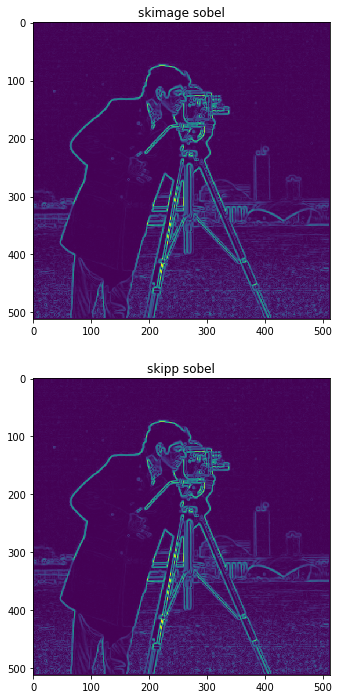

In [75]:
showCompared(skimage_sobel_result, skipp_sobel_result, x_name='skimage sobel', y_name='skipp sobel')

In [76]:
# so little mismatch if desired precision is 6
# passes if 4
try:
    assert_array_almost_equal(skimage_sobel_result, skipp_sobel_result, decimal=6)
except Exception as e:
    print(str(e))


Arrays are not almost equal to 6 decimals

Mismatch: 7.66%
Max absolute difference: 1.5258789e-05
Max relative difference: 2.1895538e-07
 x: array([[ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [ 0.      ,  1.457738,  2.015564, ...,  0.5     ,  0.      ,...
 y: array([[ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [ 0.      ,  1.457738,  2.015564, ...,  0.5     ,  0.      ,...


In [77]:
skipp.skipp.filters.sobel(x.astype(np.float32))

array([[0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.63293195, 0.91101557, 0.        ],
       [0.        , 0.16678852, 0.56163716, 0.        ],
       [0.        , 0.2928818 , 0.47952205, 0.        ],
       [0.        , 0.34876108, 0.44183525, 0.        ],
       [0.        , 0.7009842 , 0.43195882, 0.        ],
       [0.        , 0.982313  , 0.0917925 , 0.        ],
       [0.        , 1.1306688 , 0.275822  , 0.        ],
       [0.        , 0.41723734, 0.4659017 , 0.        ],
       [0.        , 0.59689814, 0.44628888, 0.        ],
       [0.        , 1.2268246 , 1.2104465 , 0.        ],
       [0.        , 0.53350055, 1.1535312 , 0.        ],
       [0.        , 0.213032  , 0.75070614, 0.        ],
       [0.        , 0.5533607 , 0.559582  , 0.        ],
       [0.        , 0.22408329, 0.54812926, 0.        ],
       [0.        , 0.        , 0.        , 0.        ]], dtype=float32)

In [78]:
skimage.filters.sobel(xc.astype(np.float32))

array([[0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.63293207, 0.9110156 , 0.        ],
       [0.        , 0.1667885 , 0.5616372 , 0.        ],
       [0.        , 0.29288176, 0.4795221 , 0.        ],
       [0.        , 0.34876114, 0.44183528, 0.        ],
       [0.        , 0.7009843 , 0.4319588 , 0.        ],
       [0.        , 0.9823131 , 0.09179248, 0.        ],
       [0.        , 1.1306688 , 0.275822  , 0.        ],
       [0.        , 0.4172374 , 0.46590173, 0.        ],
       [0.        , 0.5968982 , 0.44628888, 0.        ],
       [0.        , 1.2268248 , 1.2104465 , 0.        ],
       [0.        , 0.5335006 , 1.1535312 , 0.        ],
       [0.        , 0.21303205, 0.7507062 , 0.        ],
       [0.        , 0.55336076, 0.559582  , 0.        ],
       [0.        , 0.22408332, 0.54812926, 0.        ],
       [0.        , 0.        , 0.        , 0.        ]], dtype=float32)

## sobel_h

In [79]:
skipp_sobel_h_result = skipp.skipp.filters.sobel_h(camera_float32)

In [80]:
skimage_sobel_h_result = skimage.filters.sobel_h(camera_float32)

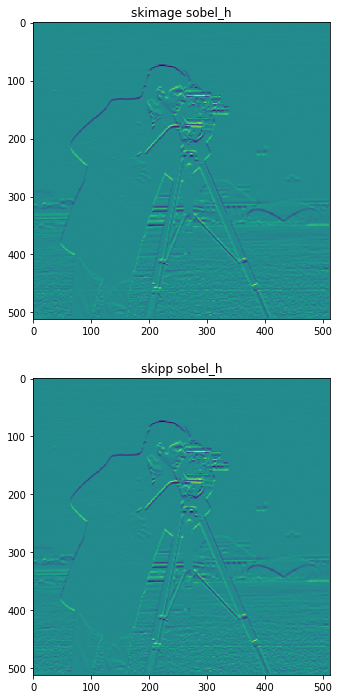

In [81]:
showCompared(skimage_sobel_h_result, skipp_sobel_h_result, x_name='skimage sobel_h', y_name='skipp sobel_h')

In [82]:
try:
    assert_array_almost_equal(skimage_sobel_h_result, skipp_sobel_h_result, decimal=6)
except Exception as e:
    print(str(e))

In [83]:
skipp.skipp.filters.sobel_h(x.astype(np.float32))

array([[ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        , -0.6702708 , -0.61139184,  0.        ],
       [ 0.        ,  0.14629008,  0.14288351,  0.        ],
       [ 0.        ,  0.13370214, -0.6465194 ,  0.        ],
       [ 0.        , -0.45739186,  0.07431248,  0.        ],
       [ 0.        , -0.49751216, -0.2792285 ,  0.        ],
       [ 0.        ,  1.2519401 ,  0.12927258,  0.        ],
       [ 0.        , -1.1510181 , -0.24255979,  0.        ],
       [ 0.        , -0.3446802 , -0.50799817,  0.        ],
       [ 0.        , -0.09939206, -0.09037787,  0.        ],
       [ 0.        , -1.4715799 , -0.5728995 ,  0.        ],
       [ 0.        ,  0.66500354,  0.31625307,  0.        ],
       [ 0.        , -0.06541395,  0.33937743,  0.        ],
       [ 0.        ,  0.742996  ,  0.07196438,  0.        ],
       [ 0.        ,  0.17388469, -0.72586584,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ]],
      dtype=float32)

In [84]:
skimage.filters.sobel_h(xc.astype(np.float32))

array([[ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        , -0.6702708 , -0.6113918 ,  0.        ],
       [ 0.        ,  0.14629006,  0.14288351,  0.        ],
       [ 0.        ,  0.13370213, -0.6465194 ,  0.        ],
       [ 0.        , -0.45739183,  0.07431253,  0.        ],
       [ 0.        , -0.49751216, -0.27922848,  0.        ],
       [ 0.        ,  1.2519401 ,  0.12927255,  0.        ],
       [ 0.        , -1.1510181 , -0.24255982,  0.        ],
       [ 0.        , -0.3446802 , -0.50799817,  0.        ],
       [ 0.        , -0.09939208, -0.0903778 ,  0.        ],
       [ 0.        , -1.4715799 , -0.5728995 ,  0.        ],
       [ 0.        ,  0.66500354,  0.31625304,  0.        ],
       [ 0.        , -0.06541393,  0.33937743,  0.        ],
       [ 0.        ,  0.742996  ,  0.07196435,  0.        ],
       [ 0.        ,  0.17388469, -0.7258659 ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ]],
      dtype=float32)

## sobel_v

In [85]:
skipp_sobel_v_result = skipp.skipp.filters.sobel_v(camera_float32)

In [86]:
skimage_sobel_v_result = skimage.filters.sobel_v(camera_float32)

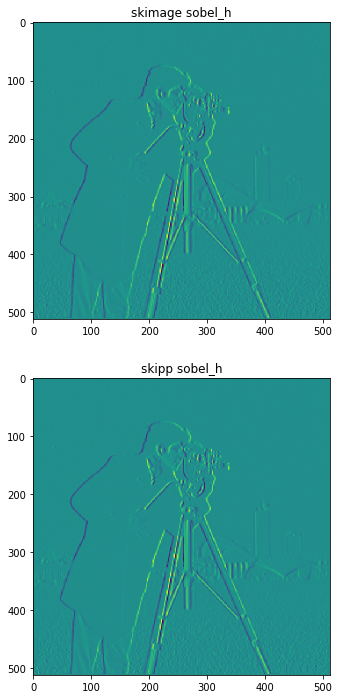

In [87]:
showCompared(skimage_sobel_v_result, skipp_sobel_v_result, x_name='skimage sobel_h', y_name='skipp sobel_h')

In [88]:
try:
    assert_array_almost_equal(skimage_sobel_v_result, skipp_sobel_v_result, decimal=6)
except Exception as e:
    print(str(e))

In [89]:
skipp.skipp.filters.sobel_v(x.astype(np.float32))

array([[ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        , -0.5932478 ,  1.134063  ,  0.        ],
       [ 0.        , -0.1850298 ,  0.7813175 ,  0.        ],
       [ 0.        , -0.3920245 ,  0.20468402,  0.        ],
       [ 0.        ,  0.18455714, -0.62041485,  0.        ],
       [ 0.        ,  0.857461  , -0.5433307 ,  0.        ],
       [ 0.        , -0.60209954,  0.01184595,  0.        ],
       [ 0.        , -1.1099466 ,  0.3054837 ,  0.        ],
       [ 0.        , -0.47892553,  0.41960305,  0.        ],
       [ 0.        , -0.83826965,  0.62464345,  0.        ],
       [ 0.        , -0.9190488 ,  1.6131172 ,  0.        ],
       [ 0.        , -0.35639304,  1.6003914 ,  0.        ],
       [ 0.        ,  0.29408556,  1.0059536 ,  0.        ],
       [ 0.        ,  0.2457094 ,  0.7880895 ,  0.        ],
       [ 0.        , -0.26493543, -0.2720479 ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ]],
      dtype=float32)

In [90]:
skimage.filters.sobel_v(xc.astype(np.float32))

array([[ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        , -0.5932478 ,  1.134063  ,  0.        ],
       [ 0.        , -0.1850298 ,  0.7813175 ,  0.        ],
       [ 0.        , -0.3920245 ,  0.20468402,  0.        ],
       [ 0.        ,  0.18455717, -0.6204148 ,  0.        ],
       [ 0.        ,  0.8574611 , -0.5433307 ,  0.        ],
       [ 0.        , -0.60209954,  0.01184597,  0.        ],
       [ 0.        , -1.1099465 ,  0.3054837 ,  0.        ],
       [ 0.        , -0.47892553,  0.419603  ,  0.        ],
       [ 0.        , -0.83826965,  0.6246434 ,  0.        ],
       [ 0.        , -0.9190488 ,  1.6131172 ,  0.        ],
       [ 0.        , -0.35639307,  1.6003914 ,  0.        ],
       [ 0.        ,  0.29408556,  1.0059536 ,  0.        ],
       [ 0.        ,  0.24570943,  0.7880895 ,  0.        ],
       [ 0.        , -0.2649354 , -0.27204788,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ]],
      dtype=float32)

# Morphology module

dtypes for grayscale images:
* np.float32
* np.uint8, np.uint16, np.int16

dtypes for multichannel images:
* np.float32
* np.uint8

## `erosion`

#### default `selem`

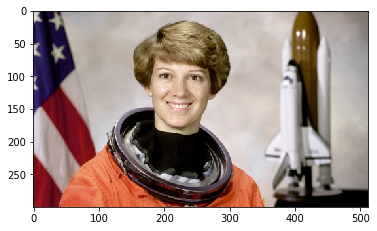

In [91]:
plt.imshow(astronaut)

Erosion by `scikit-ipp`'s `erosion` function

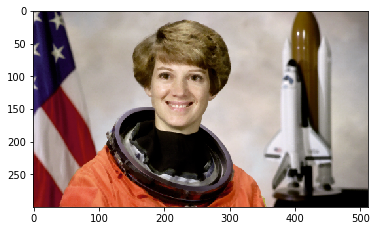

In [92]:
plt.imshow(skipp.skipp.morphology.erosion(astronaut))

Erosion by `scikit-image`'s `erosion` function

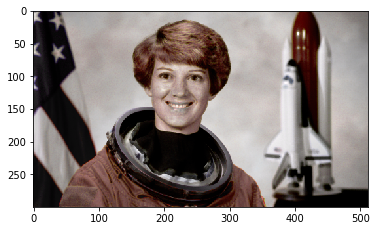

In [93]:
plt.imshow(skimage.morphology.erosion(astronaut))

Little differences in erosion results for multichannel images between `scikit-ipp` and `sciki-image` 

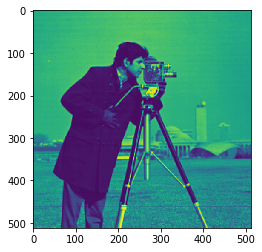

In [94]:
plt.imshow(camera)

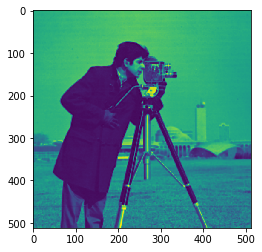

In [95]:
skipp_erosion = skipp.skipp.morphology.erosion(camera)
plt.imshow(skipp_erosion)

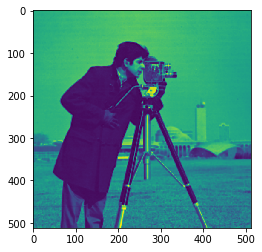

In [96]:
skimage_erosion = skimage.morphology.erosion(camera)
plt.imshow(skimage_erosion)

In [97]:
try:
    np.testing.assert_allclose(skipp_erosion, skimage_erosion)
except Exception as e:
    print(str(e))

#### not default `selem`

In [98]:
from skimage.morphology import square

In [99]:
bright_square = np.array([[0, 0, 0, 0, 0],
                          [0, 1, 1, 1, 0],
                          [0, 1, 1, 1, 0],
                          [0, 1, 1, 1, 0],
                          [0, 0, 0, 0, 0]], dtype=np.uint8)

In [100]:
skipp.skipp.morphology.erosion(bright_square, square(3))

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]], dtype=uint8)

In [101]:
skimage.morphology.erosion(bright_square, square(3))

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]], dtype=uint8)

In [102]:
square_c3 = np.ones((10,10,3), dtype=np.uint8)

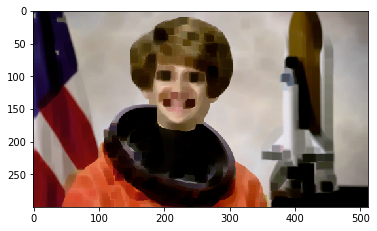

In [103]:
skipp_erosion = skipp.skipp.morphology.erosion(astronaut,  square_c3)
plt.imshow(skipp_erosion)

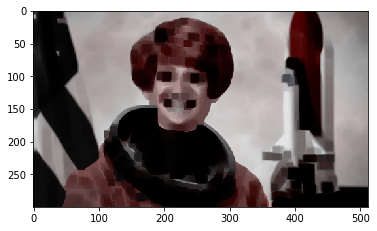

In [104]:
skimage_erosion = skimage.morphology.erosion(astronaut,  square_c3)
plt.imshow(skimage_erosion)

Little differences in dilation results for multichannel images between `scikit-ipp` and `sciki-image` 

In [105]:
try:
    np.testing.assert_allclose(skipp_erosion, skimage_erosion)
except Exception as e:
    print(str(e))


Not equal to tolerance rtol=1e-07, atol=0

Mismatch: 74%
Max absolute difference: 255
Max relative difference: 255.
 x: array([[[ 54,  51,  98],
        [ 54,  51,  98],
        [ 54,  51,  98],...
 y: array([[[ 51,  51,  51],
        [ 51,  51,  51],
        [ 51,  51,  51],...


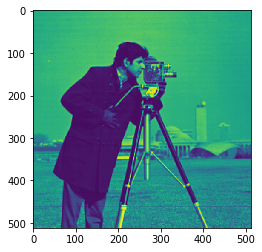

In [106]:
plt.imshow(camera)

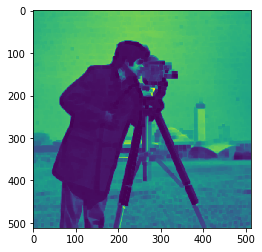

In [107]:
skipp_erosion = skipp.skipp.morphology.erosion(camera, square(7))
plt.imshow(skipp_erosion)

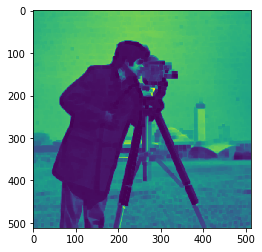

In [108]:
skimage_erosion = skimage.morphology.erosion(camera, square(7))
plt.imshow(skimage_erosion)

In [109]:
try:
    np.testing.assert_allclose(skipp_erosion, skimage_erosion)
except Exception as e:
    print(str(e))

## `dilation`

#### default `selem`

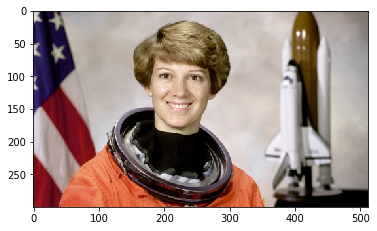

In [110]:
plt.imshow(astronaut)

Erosion by `scikit-ipp`'s `dilation` function

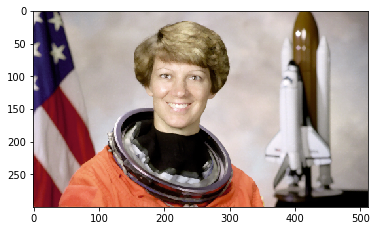

In [111]:
skipp_dilation = skipp.skipp.morphology.dilation(astronaut)
plt.imshow(skipp_dilation)

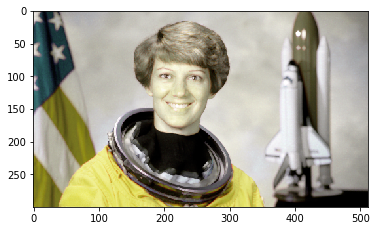

In [112]:
skimage_dilation = skimage.morphology.dilation(astronaut)
plt.imshow(skimage_dilation)

Little differences in dilation results for multichannel images between `scikit-ipp` and `sciki-image` 

In [113]:
try:
    np.testing.assert_allclose(skipp_dilation, skimage_dilation)
except Exception as e:
    print(str(e))


Not equal to tolerance rtol=1e-07, atol=0

Mismatch: 41.6%
Max absolute difference: 255
Max relative difference: 255.
 x: array([[[177, 171, 171],
        [154, 147, 151],
        [113, 114, 124],...
 y: array([[[177, 171, 171],
        [154, 147, 151],
        [113, 114, 124],...


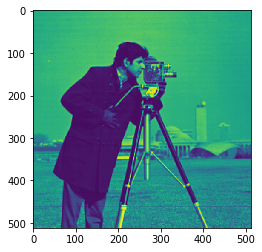

In [114]:
plt.imshow(camera)

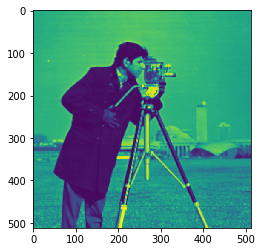

In [115]:
skipp_dilation = skipp.skipp.morphology.dilation(camera)
plt.imshow(skipp_dilation)

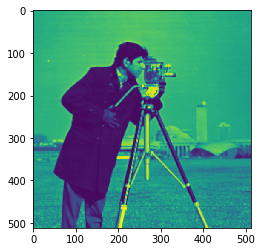

In [116]:
skimage_dilation = skimage.morphology.dilation(camera)
plt.imshow(skimage_dilation)

In [117]:
try:
    np.testing.assert_allclose(skipp_dilation, skimage_dilation)
except Exception as e:
    print(str(e))

#### not default `selem`

In [118]:
from skimage.morphology import square

In [119]:
bright_square = np.array([[0, 0, 0, 0, 0],
                          [0, 0, 0, 0, 0],
                          [0, 0, 1, 0, 0],
                          [0, 0, 0, 0, 0],
                          [0, 0, 0, 0, 0]], dtype=np.uint8)

In [120]:
skipp.skipp.morphology.dilation(bright_square, square(3))

array([[0, 0, 0, 0, 0],
       [0, 1, 1, 1, 0],
       [0, 1, 1, 1, 0],
       [0, 1, 1, 1, 0],
       [0, 0, 0, 0, 0]], dtype=uint8)

In [121]:
skimage.morphology.dilation(bright_square, square(3))

array([[0, 0, 0, 0, 0],
       [0, 1, 1, 1, 0],
       [0, 1, 1, 1, 0],
       [0, 1, 1, 1, 0],
       [0, 0, 0, 0, 0]], dtype=uint8)

In [122]:
square_c3 = np.ones((10,10,3), dtype=np.uint8)

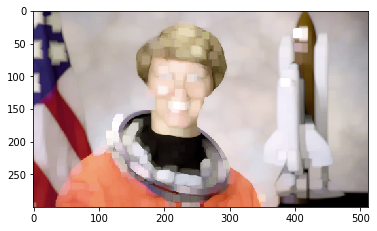

In [123]:
skipp_dilation = skipp.skipp.morphology.dilation(astronaut,  square_c3)
plt.imshow(skipp_dilation)

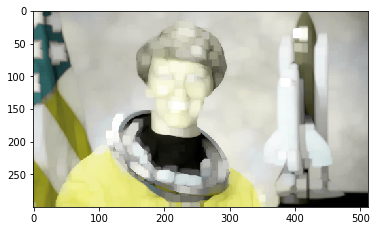

In [124]:
skimage_dilation = skimage.morphology.dilation(astronaut,  square_c3)
plt.imshow(skimage_dilation)

Little differences in dilation results for multichannel images between `scikit-ipp` and `sciki-image` 

In [125]:
try:
    np.testing.assert_allclose(skipp_dilation, skimage_dilation)
except Exception as e:
    print(str(e))


Not equal to tolerance rtol=1e-07, atol=0

Mismatch: 52.6%
Max absolute difference: 255
Max relative difference: 255.
 x: array([[[236, 229, 226],
        [236, 229, 226],
        [236, 229, 226],...
 y: array([[[236, 236, 229],
        [236, 236, 229],
        [236, 236, 229],...


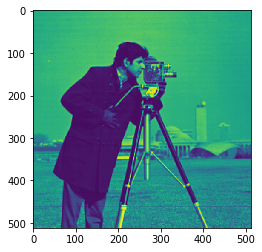

In [126]:
plt.imshow(camera)

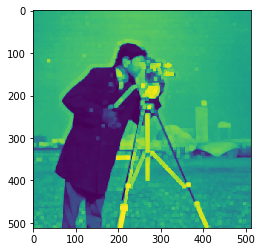

In [127]:
skipp_dilation = skipp.skipp.morphology.dilation(camera, square(7))
plt.imshow(skipp_dilation)

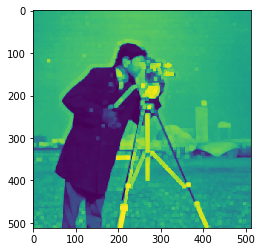

In [128]:
skimage_dilation = skimage.morphology.dilation(camera, square(7))
plt.imshow(skimage_dilation)

In [129]:
try:
    np.testing.assert_allclose(skipp_dilation, skimage_dilation)
except Exception as e:
    print(str(e))